In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
df= pd.read_csv('C:\\Users\\amrit\\Downloads\\EDA\\EDA - Takehome Week 1\\EDA - Takehome (Week-1(Part-2))\\customer_tip.csv')

df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [3]:
df.info()

# There are 244 rows and 7 columns in dataset.

# total_bill , tip , size are numerical columns and sex, smoker, day, time are categorical columns in the dataset.


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   total_bill  244 non-null    float64
 1   tip         244 non-null    float64
 2   sex         244 non-null    object 
 3   smoker      244 non-null    object 
 4   day         244 non-null    object 
 5   time        244 non-null    object 
 6   size        244 non-null    int64  
dtypes: float64(2), int64(1), object(4)
memory usage: 13.5+ KB


In [4]:
df.describe(include = 'all')

# 5 point summary of the customer tip dataset.

# The categorical column day has 4 categories and rest 3 sex, smoker, time have 2 categories in their data values.

# include ='all' , makes describe function state summary of categorical columns also since describe function by default works with numerical data only.


,total_bill,tip,sex,smoker,day,time,size
count,244.000000,244.000000,244,244,244,244,244.000000
unique,NaN,NaN,2,2,4,2,NaN
top,NaN,NaN,Male,No,Sat,Dinner,NaN
freq,NaN,NaN,157,151,87,176,NaN
mean,19.785943,2.998279,NaN,NaN,NaN,NaN,2.569672
std,8.902412,1.383638,NaN,NaN,NaN,NaN,0.951100
min,3.070000,1.000000,NaN,NaN,NaN,NaN,1.000000
25%,13.347500,2.000000,NaN,NaN,NaN,NaN,2.000000
50%,17.795000,2.900000,NaN,NaN,NaN,NaN,2.000000
75%,24.127500,3.562500,NaN,NaN,NaN,NaN,3.000000


In [5]:
df.isnull().sum()

# no null values in dataset.


total_bill    0
tip           0
sex           0
smoker        0
day           0
time          0
size          0
dtype: int64

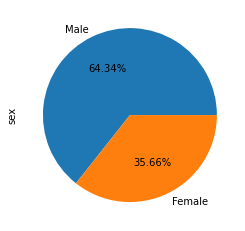

In [6]:
 # Q1. what is percentage of males and females in dataset. diplay with graph

df['sex'].value_counts().plot(kind = 'pie' , autopct ='%1.2f%%')

plt.show()

# there are 64.34% males and 35.66% females in the dataset of Customer tip given.


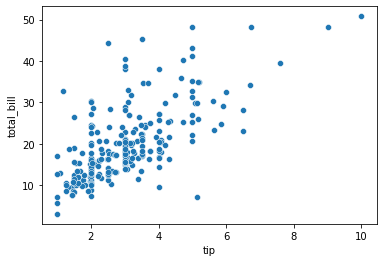

In [7]:
# Q2. Is there any relationship between tip and total bill amount? Support your answer with a plot. 

# bivariate analysis - tip and total_bill columns - numerical both

sns.scatterplot(df['tip'] , df['total_bill'])

plt.show()

# The scatterplot graph between the columns shows a positive relationship.

# The maximum tip given was 10$ at total_bill amount of 50$.

# MAximum individuals have total_bill amount in 10-20 $ range and tip in 1-4 $ range.


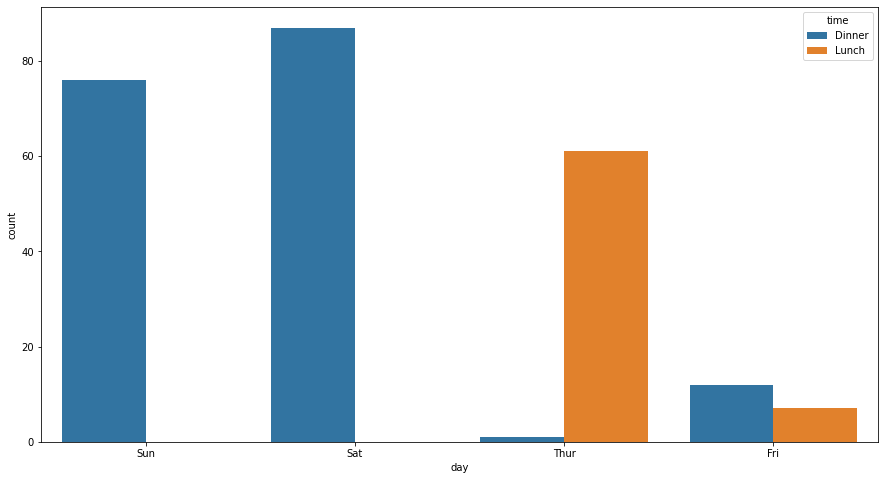

In [8]:
#Q3. which is busiest day and time at restaurant ?

#Bivariate analysis - Day , time - categorical both

plt.figure(figsize =(15, 8))

sns.countplot(data = df , x ='day' , hue = 'time')

plt.show()



In [9]:
pd.crosstab(df['day'] , df['time'])

#Thus, on weekends Sat and Sun, people are visiting at dinner only.


time,Dinner,Lunch
day,,
Fri,12,7
Sat,87,0
Sun,76,0
Thur,1,61


In [10]:
# Q4. compute the genderwise count based on smoking habits.

pd.crosstab(df['sex'] , df['smoker'])

smoker,No,Yes
sex,,
Female,54,33
Male,97,60


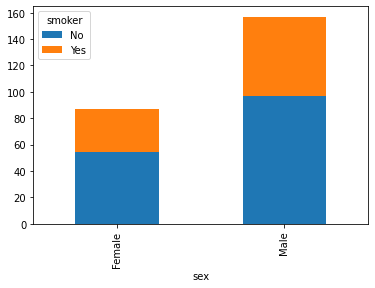

In [11]:
pd.crosstab(df['sex'] , df['smoker']).plot(kind = 'bar' , stacked = True)

plt.show()


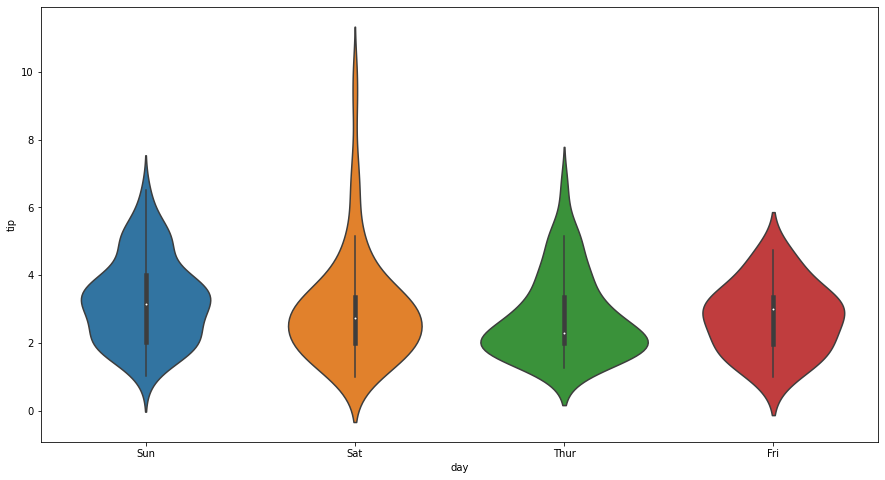

In [12]:
# Q5. compare the tip amount given for different days.

# bivariate analysis - tip , day - numerical, categorical

plt.figure(figsize = (15,8))

sns.violinplot(df['day'] , df['tip'] )

plt.show()

# Saturday and Thursday are the only days having outliers on positive end with tip amount maximum from all days on saturday of 10 $.

# On sundays people give extra tip and difference is significantly noticeable over graph.


In [13]:
# Q6. Is the average bill amount dependent on size of group?

avg_total_bill = df[['total_bill' , 'size']].groupby('size').mean()

avg_total_bill

,total_bill
size,
1,7.242500
2,16.448013
3,23.277632
4,28.613514
5,30.068000
6,34.830000


In [14]:
size_index = avg_total_bill.index

size_index


Int64Index([1, 2, 3, 4, 5, 6], dtype='int64', name='size')

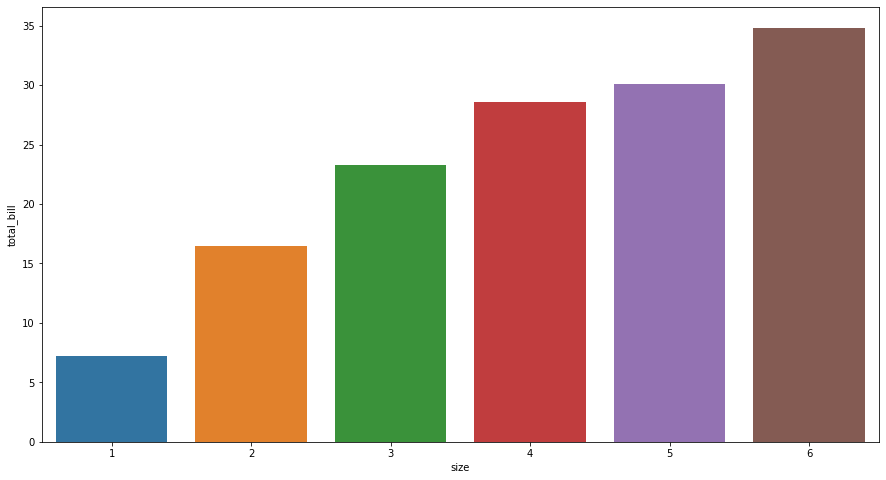

In [15]:
plt.figure(figsize = (15,8))

sns.barplot(x = size_index , y = avg_total_bill['total_bill'] )

plt.show()

# The Average total_bill amount is increasing with the size.


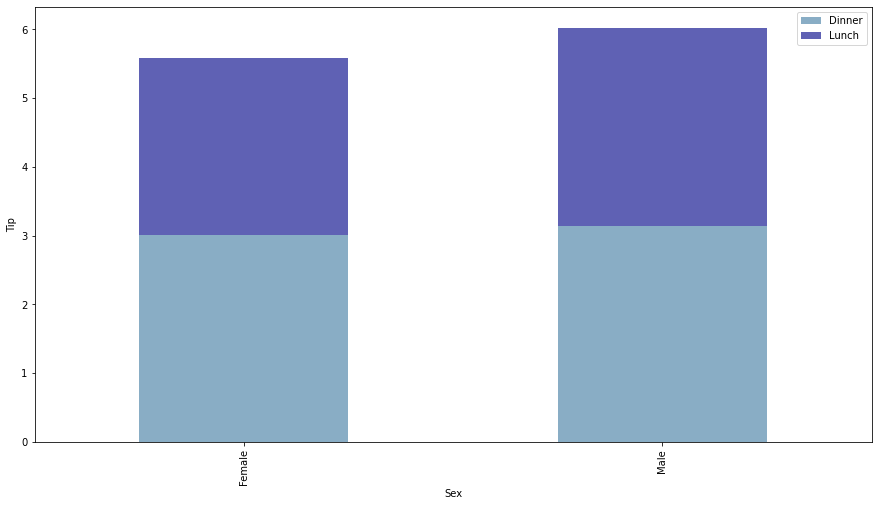

In [16]:
# Q7. Is the tip amount varying based on gender and time?

# Multivariate analysis - tip, gender, time - numerical, cat, cat

stack = pd.pivot_table(data = df, index = ['sex'] , columns= ['time'] , values = 'tip' , aggfunc = 'mean')

color = sns.color_palette('twilight')

fig = stack.plot.bar(stacked = True, figsize = (15,8) , color = color )

plt.xlabel('Sex')
plt.ylabel('Tip')
fig.legend(loc = 'upper right')

plt.show()

# The stacked bar plot depicts that there is no significant difference in tip given by Males and Females.


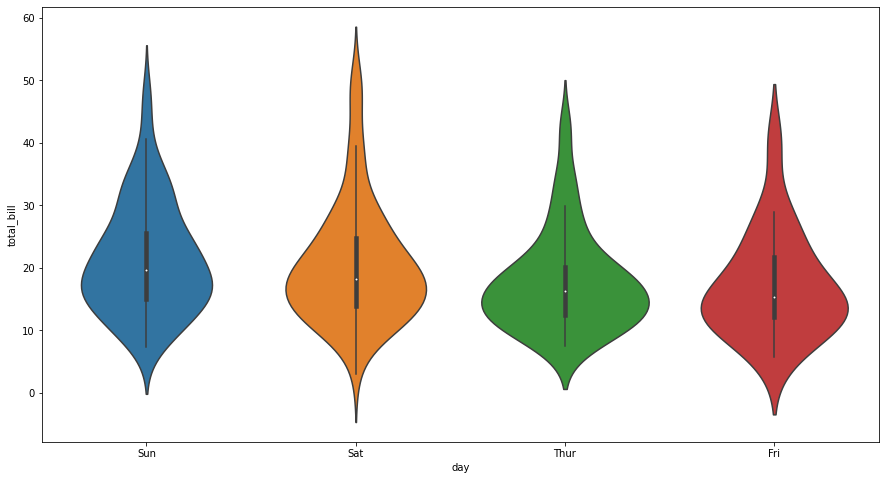

In [17]:
#Q8. Visualize the average bill amount for each day.

plt.figure(figsize = (15, 8))

sns.violinplot(data = df, x ='day' , y ='total_bill')

plt.show()



In [18]:
# In a violin plot, the pointed peaks below and above indicate outliers. Middle values are the density plot with white dot of median.

# The broad dark black line in centre's lowest value is First Quartile Q1 and Highest value is Third Quartile Q3.

# The longer black line in center has lower adjacent values(Q1 - 1.5 * IQR) below and upper adjacent values(Q3 + 1.5 IQR) above of the graph.


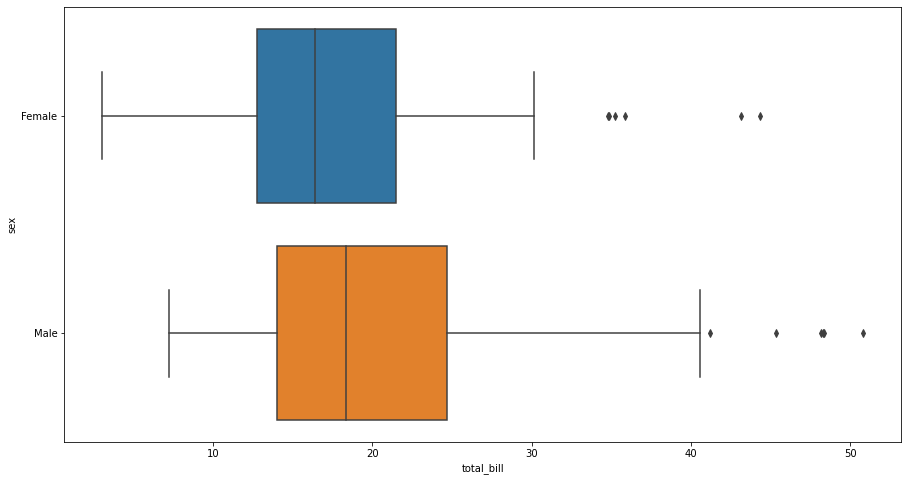

In [19]:
#Q9. Plot a horizontal boxplot to compare bill amount based on gender.

plt.figure(figsize = (15,8))

sns.boxplot( df['total_bill'] , df['sex'])

plt.show()

# The average total_bill amount is slightly higher for males than females and outliers are present for both the distributions.


In [20]:
#Q10. Find maximum bill amount for lunch and dinner on Saturday and Sunday.

df_weekend = df[ (df['day'] == 'Sat') | (df['day'] == 'Sun') ]

max_amt = pd.pivot_table(data = df, values = 'total_bill' , index = 'time' , columns ='day' , aggfunc = 'max')

max_amt

# Saturday and Sunday maximum total_bill amount is 50.81 $ and 48.17 $ respectively.

# Also, for Lunch, there are no values for total_bill on weekends indicating nobody is taking Lunch on weekends.


day,Fri,Sat,Sun,Thur
time,,,,
Dinner,40.17,50.81,48.17,18.78
Lunch,16.27,NaN,NaN,43.11
